<a href="https://colab.research.google.com/github/burrittresearch/iris-flower-classification-in-python/blob/main/iris_flower_classification_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification in Python
This notebook includes coding and notes for predicting iris flower species using random forest classification machine learning in python.

Data Source: [Scikit-learn Iris Plants Dataset]('https://scikit-learn.org/stable/datasets/toy_dataset.html')

# Project Workflow
* Define the Problem
* Process Data
* Model Predictions
* Evalute the Model
* Tune the Model
* Plot the Results
* Deploy the Model
* Save Dataframe to CSV

# Define the Problem
What species of iris are these flowers?

# Process Data

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score 
from sklearn.model_selection import train_test_split

# Import data
from sklearn.datasets import load_iris

In [2]:
# Set display options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)
pd.set_option('display.colheader_justify', 'left')
pd.set_option('display.precision', 3)

str_lb = '\n'

In [3]:
# Load data
iris_data = load_iris()

In [4]:
# Explore data
print(load_iris().data[0:10])
print(type(load_iris().data))

print(load_iris().target[0:10])
print(type(load_iris().target))

print(load_iris().target_names)
print(type(load_iris().target_names))

print(load_iris().feature_names)
print(type(load_iris().feature_names))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'list'>


In [5]:
# Explore data
print(load_iris().DESCR)
print(iris_data.data[:10])
print(iris_data.feature_names)
print(iris_data.target_names)
print(iris_data.target)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# Load data
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Create species and target columns
df_iris['species_target'] = iris_data.target
df_iris['species_target_name'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)
print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species_target species_target_name
0    5.1                3.5               1.4                0.2               0                  setosa         
1    4.9                3.0               1.4                0.2               0                  setosa         
2    4.7                3.2               1.3                0.2               0                  setosa         
3    4.6                3.1               1.5                0.2               0                  setosa         
4    5.0                3.6               1.4                0.2               0                  setosa         
..                 ...               ...                ...               ...             ...                 ...
145  6.7                3.0               5.2                2.3               2               virginica         
146  6.3                2.5               5.0                1.9               2        

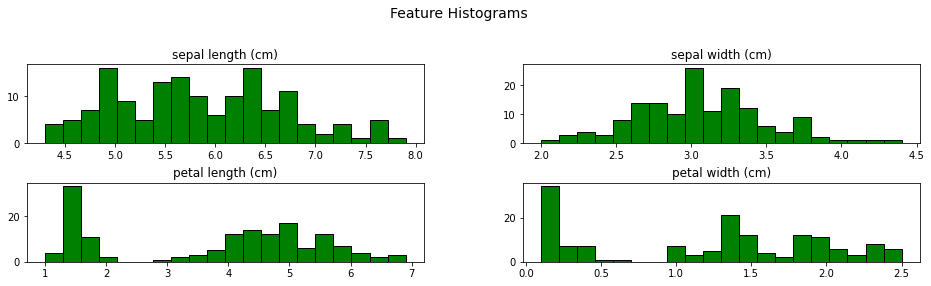

In [7]:
# Create function to visualize the features in histograms

def plot_hist(dataframe, lst_features, int_rows, int_cols):

  fig = plt.figure(figsize=(16, 8))
  fig.suptitle('Feature Histograms', fontsize=14)

  for int_index, str_feature in enumerate(lst_features):
    ax = fig.add_subplot(int_rows, int_cols, int_index + 1)
    ax.hist(dataframe[str_feature], bins=20, color='green', edgecolor='black')
    ax.set_title(str_feature, fontsize=12)
    plt.subplots_adjust(hspace=0.50, wspace=0.25)
  plt.show()

plot_hist(df_iris, iris_data.feature_names, 4, 2)

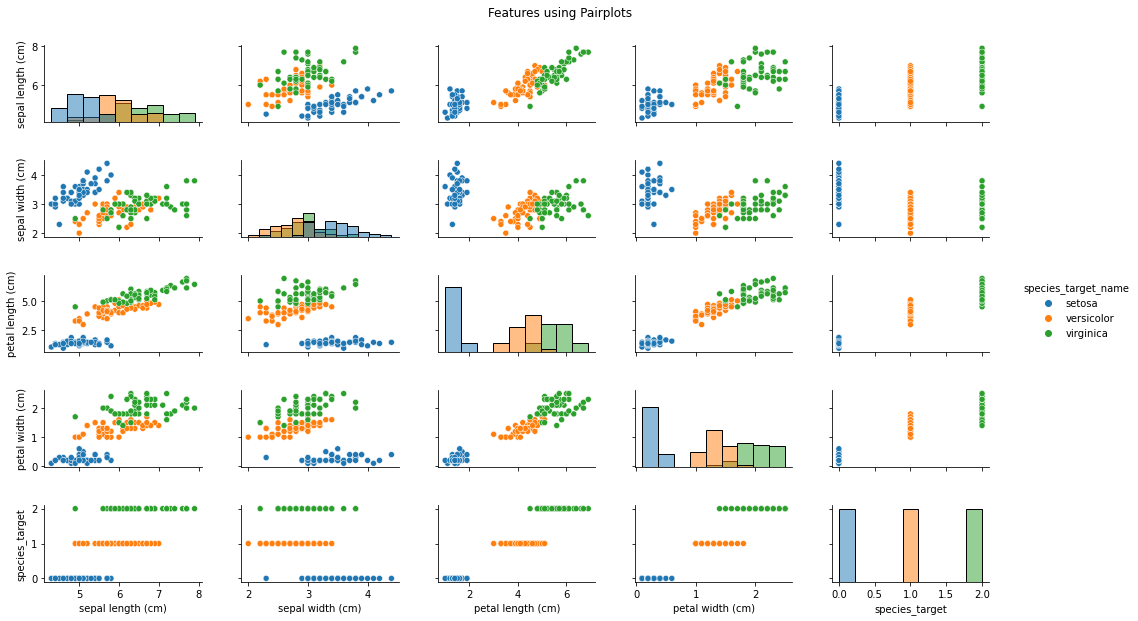

In [8]:
# Visualize features using pairplots

grid_pair = sns.pairplot(df_iris, hue='species_target_name', kind='scatter', diag_kind='hist')
grid_pair.fig.set_size_inches(16, 8)
grid_pair.fig.suptitle('Features using Pairplots', y=1.05, fontsize=12)
grid_pair.fig.subplots_adjust(hspace=0.50, wspace=0.25)
plt.show()


# Model Predictions

In [9]:
# Create the training and test sets
X = df_iris[iris_data.feature_names]
y = df_iris.species_target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [10]:
# Create the model using random forest classifier
iris_model = RandomForestClassifier()

# Train the model
iris_model.fit(X_train, y_train)

# Predict iris flowers for test set
y_hat = iris_model.predict(X_test)

In [11]:
# Explore model parameters

# iris_model.fit
print(X_train)
print(type(X_train))
print(X_train.shape)
print(y_train)
print(type(y_train))
print(y_train.shape)

# iris_model.predict
print(y_hat)
print(type(y_hat))
print(y_hat.shape)
print(X_test)
print(type(X_test))
print(X_test.shape)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
61   5.9                3.0               4.2                1.5             
92   5.8                2.6               4.0                1.2             
112  6.8                3.0               5.5                2.1             
2    4.7                3.2               1.3                0.2             
141  6.9                3.1               5.1                2.3             
..                 ...               ...                ...               ...
9    4.9                3.1               1.5                0.1             
103  6.3                2.9               5.6                1.8             
67   5.8                2.7               4.1                1.0             
117  7.7                3.8               6.7                2.2             
47   4.6                3.2               1.4                0.2             

[112 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
(1

In [12]:
# Create new dataframe comparing predicted and actual results
df_iris_results = X_test.copy()
df_iris_results['species_target'] = df_iris.species_target
df_iris_results['species_target_name'] = df_iris.species_target_name
df_iris_results['species_prediction'] = y_hat
df_iris_results = df_iris_results[['species_target_name', 'species_target','species_prediction']]
print(df_iris_results)

    species_target_name  species_target  species_prediction
114   virginica          2               2                 
62   versicolor          1               1                 
33       setosa          0               0                 
107   virginica          2               2                 
7        setosa          0               0                 
100   virginica          2               2                 
40       setosa          0               0                 
86   versicolor          1               1                 
76   versicolor          1               1                 
71   versicolor          1               1                 
134   virginica          2               2                 
51   versicolor          1               1                 
73   versicolor          1               1                 
54   versicolor          1               1                 
63   versicolor          1               1                 
37       setosa          0              

In [13]:
# Add column for accuracy results
df_iris_results = df_iris_results.copy()
df_iris_results['accuracy'] = np.where((df_iris_results.species_target == df_iris_results.species_prediction), 'accurate', 'inaccurate' )
print(df_iris_results)

    species_target_name  species_target  species_prediction accuracy   
114   virginica          2               2                     accurate
62   versicolor          1               1                     accurate
33       setosa          0               0                     accurate
107   virginica          2               2                     accurate
7        setosa          0               0                     accurate
100   virginica          2               2                     accurate
40       setosa          0               0                     accurate
86   versicolor          1               1                     accurate
76   versicolor          1               1                     accurate
71   versicolor          1               1                     accurate
134   virginica          2               2                     accurate
51   versicolor          1               1                     accurate
73   versicolor          1               1                     a

# Evalute the Model

In [14]:
# Create confusion matrix of results
print(f"Crosstab Confusion Matrix:{str_lb}{pd.crosstab(df_iris_results.species_target, df_iris_results.species_prediction, rownames=['Actual Species'], colnames=['Predicted Species'])}")

Crosstab Confusion Matrix:
Predicted Species  0   1   2
Actual Species              
0                  13   0  0
1                   0  15  1
2                   0   0  9


In [15]:
# Create classification report
print(f'Classification Report:{str_lb}{classification_report(y_test, y_hat)}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [16]:
# Percentage of correct predictions to total predictions
int_accurate_prediction = len(df_iris_results[df_iris_results.accuracy=='accurate'])
int_inaccurate_prediction = len(df_iris_results[df_iris_results.accuracy=='inaccurate'])                             
int_total_prediction = len(df_iris_results)
flt_accuracy_score = accuracy_score(y_test, y_hat)
flt_f1_score = f1_score(y_test, y_hat, average='macro')

print(f'Actual vs Predicted Species: {str_lb}')
print(f'Accurate Predictions: {int_accurate_prediction}')
print(f'Inaccurate Predictions: {int_inaccurate_prediction}')
print(f'Total Predictions: {int_total_prediction}')
print(f'Model Accuracy: {(int_accurate_prediction /int_total_prediction):.2f}')
print(f'Model Accuracy Score: {flt_accuracy_score:.4f}')
print(f'Model f1 Score: {flt_f1_score:.4f}')

Actual vs Predicted Species: 

Accurate Predictions: 37
Inaccurate Predictions: 1
Total Predictions: 38
Model Accuracy: 0.97
Model Accuracy Score: 0.9737
Model f1 Score: 0.9717


# Tune the Model

In [17]:
# Create a for loop through to tune the model changing number of trees
lst_score = []
lst_estimators = []

# Set number of trees n_estimators to between 10 and 200
arr_est_range = np.arange(10, 210, 10)

for int_est in arr_est_range:
  iris_model = RandomForestClassifier(n_estimators=int_est, random_state=0)
  iris_model.fit(X_train, y_train)
  flt_accuracy_score = accuracy_score(y_test, y_hat)
  lst_score.append(flt_accuracy_score)
  lst_estimators.append(int_est)

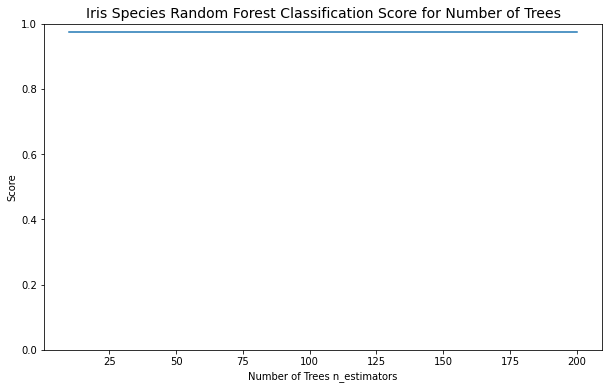

In [18]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(lst_estimators, lst_score)
ax.set_ylim(0, 1)
ax.set_xlabel('Number of Trees n_estimators')
ax.set_ylabel('Score')
ax.set_title('Iris Species Random Forest Classification Score for Number of Trees', fontsize=14)
plt.show()

# Plot the Results

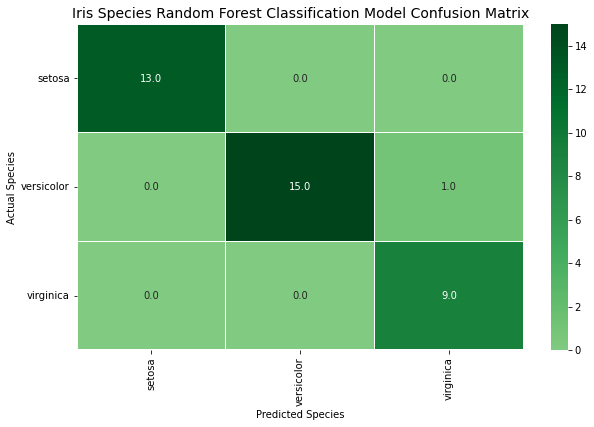

In [19]:
# Plot confusion matrix heatmap
fig, ax = plt.subplots(figsize=(10, 6))
arr_conf_matrix = confusion_matrix(df_iris_results.species_target, df_iris_results.species_prediction)
sns.heatmap(arr_conf_matrix, cmap='Greens', center=1, annot=True, fmt='.1f', linewidth=0.5)

lst_x_labels = list(iris_data.target_names)
arr_x_loc = np.arange(len(lst_x_labels))
ax.set_xticks(arr_x_loc + 0.5)
ax.set_xticklabels(lst_x_labels, rotation=90)
ax.set_yticks(arr_x_loc + 0.5)
ax.set_yticklabels(lst_x_labels, rotation=0)

ax.set_xlabel('Predicted Species')
ax.set_ylabel('Actual Species')
ax.set_title('Iris Species Random Forest Classification Model Confusion Matrix', fontsize=14)
plt.show()

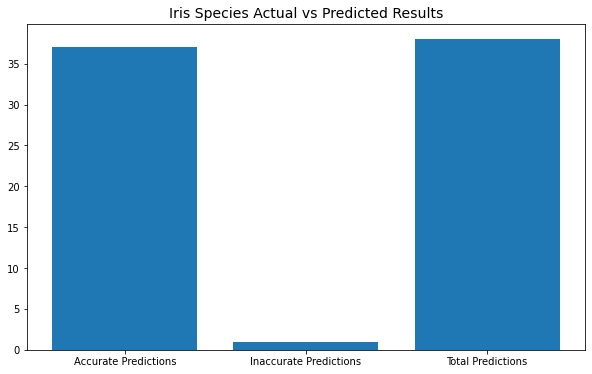

In [20]:
# Plot the model results
fig, ax = plt.subplots(figsize=(10, 6))
lst_x_labels = ['Accurate Predictions', 'Inaccurate Predictions', 'Total Predictions']
arr_x_loc = np.arange(len(lst_x_labels))
y = [int_accurate_prediction, int_inaccurate_prediction, int_total_prediction]
bars = ax.bar(lst_x_labels, y)

ax.set_xticks(arr_x_loc)
ax.set_xticklabels(lst_x_labels)
ax.set_title('Iris Species Actual vs Predicted Results', fontsize=14)
plt.show()

# Deploy


In [21]:
# Deploy the model on observed iris features
lst_observed_iris = [5.8, 2.8, 5.1, 2.4], [6.0, 2.2, 4.0, 1.0], [5.5, 4.2, 1.4, 0.2]
df_observed_iris = pd.DataFrame(lst_observed_iris, columns=iris_data.feature_names)
df_observed_iris['species_prediction'] = iris_model.predict(df_observed_iris)
print(df_observed_iris)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species_prediction
0  5.8                2.8               5.1                2.4               2                 
1  6.0                2.2               4.0                1.0               1                 
2  5.5                4.2               1.4                0.2               0                 
